In [84]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import requests
from itertools import zip_longest

%matplotlib inline

In [113]:
# helper functions 

# moving average function
def ma(x,n):
    cs = list(np.cumsum(x))
    return [ (x-y)/n for (x,y) in zip(cs, [0]*n + cs[:-n])]

# group a list into sublists of length n
def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

# Return a list of ratios between successive numbers in a list
def ratio(d):
    return [x/y for (x,y) in zip(d[1:],d[:-1])] 
    # return([1 if y == 0 else x/y for (x,y) in zip(d[1:],d[:-1])])
    # return [1]*n + [1 if y == 0 else x/y for (x,y) in zip(d[n:],d[:-n])]

In [114]:
# get some data on cumulative deaths
url = "https://api.covid19uk.live/historyfigures"
data = requests.get(url=url).json()['data']

In [115]:
totdeaths = [d['death'] for d in data if d['death'] > 60] # start after deaths  > 60
# calculate the daily deaths from the diffs
dailydeaths = [totdeaths[0]] + [ a - b  for  (a,b) in zip (totdeaths[1:], totdeaths[:-1])]

# smooth out the dailydeaths by moving average over 7 days
smoothed_dailydeaths = list(ma(dailydeaths, 7))

In [121]:
def r(deaths): 
    # group the deaths into chunks 7 days long, pad at the end with the final days number
    weeklydeaths = list(map(sum,  grouper(deaths, 7, deaths[-1])))
    return ratio(weeklydeaths)

In [126]:
rdata = r(dailydeaths)

print("Weeks after 60 deaths:", "R")
for rval in rdata:
    print("Week " + str(rdata.index(rval) + 1) + ":", rval)

Weeks after 60 deaths: R
Week 1: 4.856140350877193
Week 2: 3.031791907514451
Week 3: 1.5300285986653956
Week 4: 0.9668224299065421
Week 5: 0.8962461736748832
Week 6: 0.7893223081071364
Week 7: 0.8241858346618083


Text(0, 0.5, 'Deaths per day')

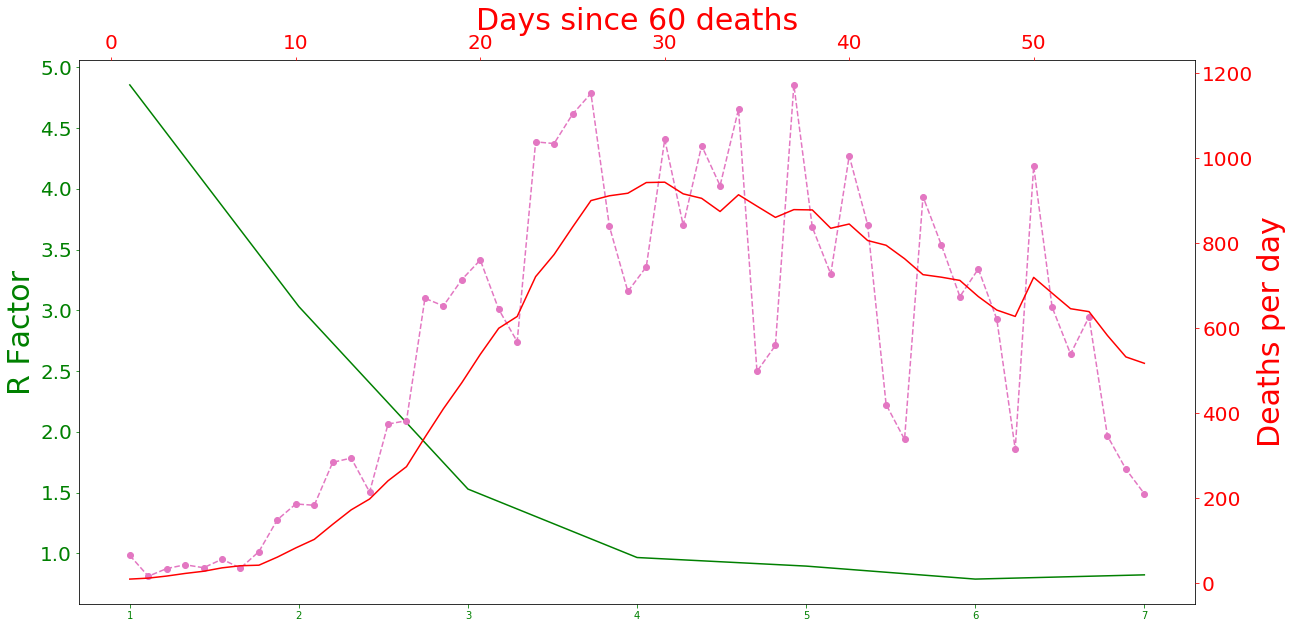

In [127]:
# Draw some pictures

rx = np.linspace(1, len(rdata), len(rdata))

# fig, ax1 = plt.subplots(1, figsize=(10, 8))

fig=plt.figure(figsize=(20, 10))

ax1=fig.add_subplot(111, label="1")
ax1.plot(rx,rdata,color="g")
ax1.tick_params(axis='x', colors="g")
ax1.tick_params(axis='y', colors="g",labelsize=20)
# ax1.set_xlabel(['Weeks since first death'], color="g",fontsize=30) 
ax1.set_ylabel('R Factor', color="g", fontsize=30)  


x = np.linspace(1, len(dailydeaths), len(dailydeaths))
ax2=fig.add_subplot(111, frame_on=False, label="2")
ax2.plot(x, dailydeaths, 'o--k',color="C6")
ax2.plot(x, smoothed_dailydeaths,color="r")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="r",labelsize=20)
ax2.tick_params(axis='y', colors="r", labelsize=20)
ax2.set_xlabel('Days since 60 deaths', color="r", fontsize=30) 
ax2.set_ylabel('Deaths per day', color="r", fontsize=30)       
# ax2 = ax1.twinx() 